<a href="https://colab.research.google.com/github/reypowgithub/Tugas_PCD_TelU_2023/blob/main/Tugas_PCD_Assigment3_1301204091_Reynhard_Powiwi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CII4F3 PEMROSESAN CITRA DIGITAL**

---

# Assignment 3: Histogram Equalization

---

<p>Nama = Reynhard Powiwi</p>
<p>Kelas = IF-44-PIL-IS02 📚👨‍🎓</p>

---

Buat program tentang histogram equalization menggunakan bahasa Python (kerjakan di Google Colab)

Tugas dikerjakan di Google Colab.

Pengumpulan tugas
1. Tuliskan dari mana source codenya 📦
2. Gunakan input citra RGB yang dibuat sendiri / milik sendiri
3. Program harus menampilkan citra asal  dan histogramnya serta citra output beserta histogramnya.
4. Hasil pekerjaan Unggah ke LMS ini file .ipynb 📸
5. Lalu, kirim link google colab-nya  ke email dosen pengampu dengan body email(gammakosala@telkomuniversity.ac.id) "Tugas_PCD_Assigment3_NIM_NAMA"


1) lakukan import library dan inputan gambar

In [ ]:
# Import Library
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab import files  # Import library for file uploads
from google.colab.patches import cv2_imshow

# Buat untuk dapat melakukan upload gambar
uploaded = files.upload()

# Print list of uploaded files
print(uploaded.keys())



Saving overexposed_gambar1.jpg to overexposed_gambar1.jpg
dict_keys(['overexposed_gambar1.jpg'])


Pertama yang harus kita lakukan adalah mengimport semua library yang dibutuhkan untuk pengerjaan project ini. kemudian kita membuat inputan files untuk memasukan citra yang akan kita proses.

2) Menampilkan citra

In [ ]:
# Pilih file yang ingin Anda gunakan
file_name = list(uploaded.keys())[0]

# Memuat gamber menggunakan CV2
img = cv2.imread(file_name, -1)

# menampilkan citra
cv2_imshow(img)

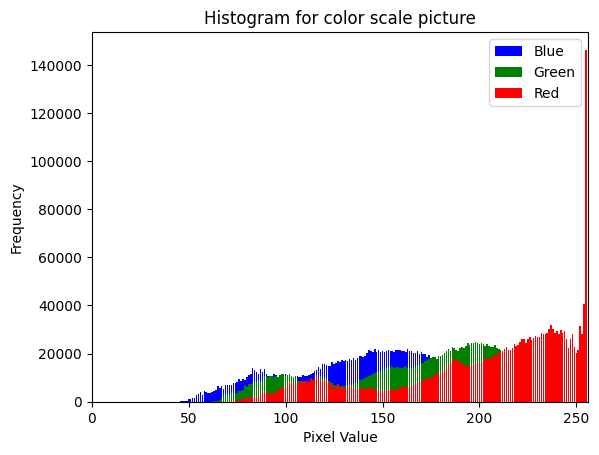

In [ ]:
#Melihat Histogram
color = ('b','g','r')
for channel, col in enumerate(color):
    histr = cv2.calcHist([img], [channel], None, [256], [0, 256])
    histr = histr.flatten().astype(int)
    x = np.arange(256)
    plt.bar(x, histr, color=col)
    plt.xlim([0, 256])

plt.title('Histogram for color scale picture')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend(['Blue', 'Green', 'Red'])
plt.show()

Kemudian kita menampilkan citra menggunakan CV2 dan membuat Histogram untuk menampikan frekuensi dan nilai piksel pada gambar yang telah dimasukan. Pada Histogram diatas kita dapat melihat bahwa penyebaran warna tidak merata dan meningkat ke sebelah kanan sehingga kita dapat melihat bahwa gambar yang dimasukan mengalami over-exposed dimana gambar terlalu terang sehingga objek tidak kelihatan.

3) Membuat Histogram Equalization

In [ ]:
# Pastikan citra dalam mode warna RGB
if len(img.shape) == 2:
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Pisahkan kanal warna
b, g, r = cv2.split(img)

# Histogram Equalization untuk setiap kanal
b_equalized = cv2.equalizeHist(b)
g_equalized = cv2.equalizeHist(g)
r_equalized = cv2.equalizeHist(r)

# Gabungkan kanal yang sudah diubah
equalized_img = cv2.merge((b_equalized, g_equalized, r_equalized))

# Simpan hasil equalization dan peningkatan kontras ke file gambar
cv2.imwrite('result.jpg', equalized_img)

img_result = cv2.imread('result.jpg', -1)  # Gunakan mode '-1' untuk citra RGB

# menampilkan citra
cv2_imshow(img_result)

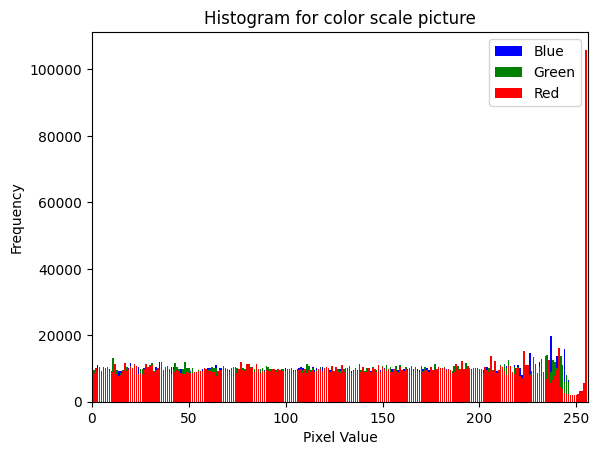

In [ ]:
#Melihat Histogram
for channel, col in enumerate(color):
    histr = cv2.calcHist([img_result], [channel], None, [256], [0, 256])
    histr = histr.flatten().astype(int)
    x = np.arange(256)
    plt.bar(x, histr, color=col)
    plt.xlim([0, 256])

plt.title('Histogram for color scale picture')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend(['Blue', 'Green', 'Red'])
plt.show()

Setelah melakukan Histogram Equalization, kita dapat melihat penyebaran warna pada histogram menjadi lebih merata. Hal ini juga yang pada akhirnya membuat gambar yang sebelumnya over-exposed sehingga objek tidak kelihatan, sekarang sudah menjadi lebih baik dan objek lebih kelihatan

---

**Referensi:**

*     [IMAGE HISTOGRAM]( https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_image_histogram_calcHist.php)
*    [Histogram Equalization in Python]( https://code.tutsplus.com/histogram-equalization-in-python--cms-30202t)





